In [6]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from scipy import stats as st

# $$\text{Feature Engineering}$$

## Foreseeing variables problems when building ML models 
- Identifying numerical and categorical vars
- Quantifying missing data
- Determining cardinality in categorical vars
- pinpointing rare categories in categorical vars
- Identifying a normal distribution
- Highlighting outliers
- comparing feature magnitude


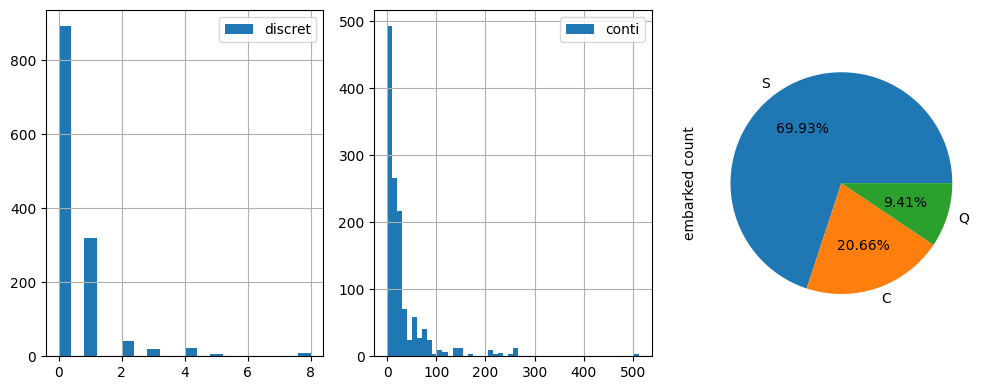

C:\Users\muthu\AppData\Local\Temp\ipykernel_16424\99649358.py:45: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  cup98LRN = pd.read_csv('../assets/FeatureEng/cup98lrn.zip')


         missing_percent   dtypes
AGE             24.80296  float64
NUMCHLD        87.018404  float64
INCOME         22.309563  float64
WEALTH1        46.882992  float64
MBCRAFT        55.395548  float64
MBGARDEN       55.395548  float64
MBBOOKS        55.395548  float64
MBCOLECT       55.458433  float64
MAGFAML        55.395548  float64
MAGFEM         55.395548  float64
MAGMALE        55.395548  float64


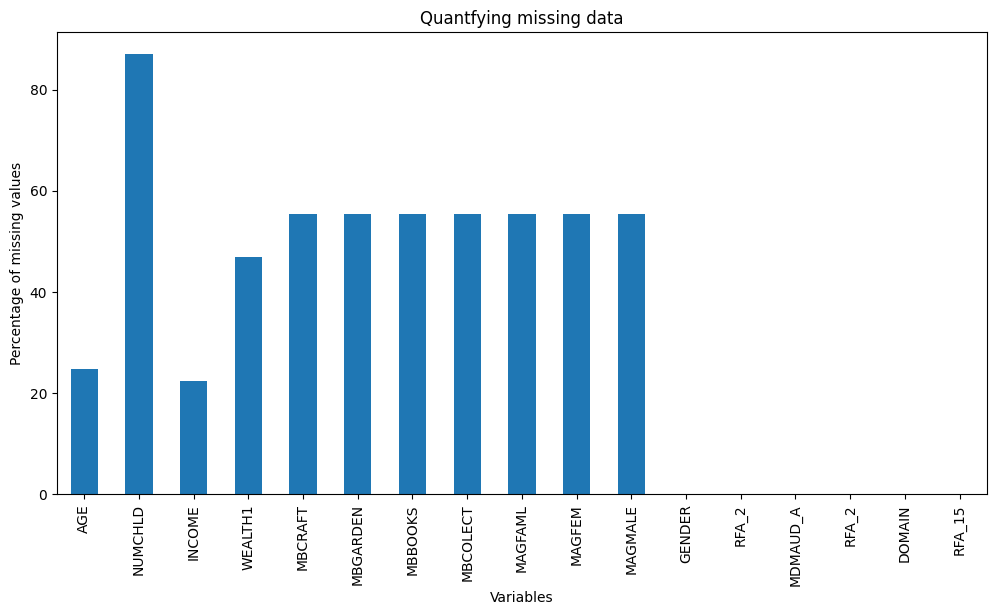

          nunique
GENDER          6
RFA_2          14
MDMAUD_A        5
RFA_2          14
DOMAIN         16
RFA_15         33


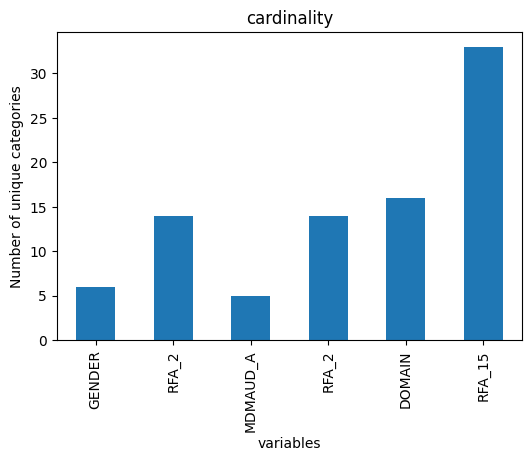

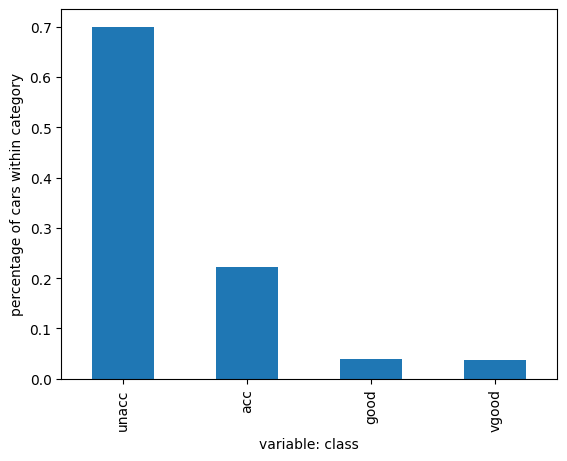

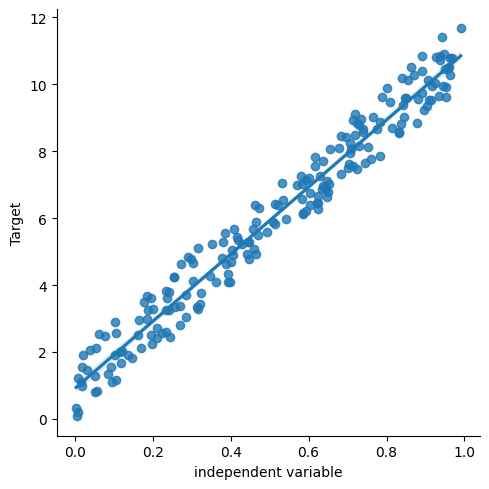

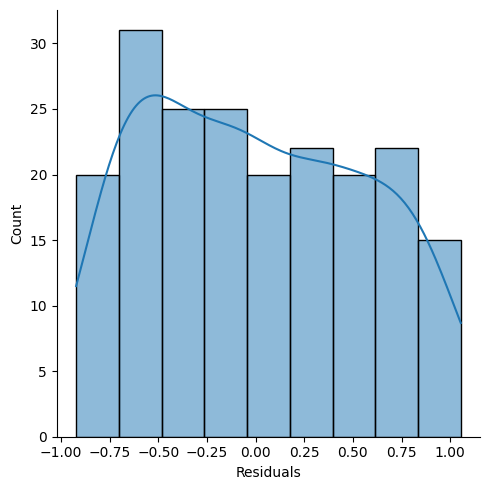

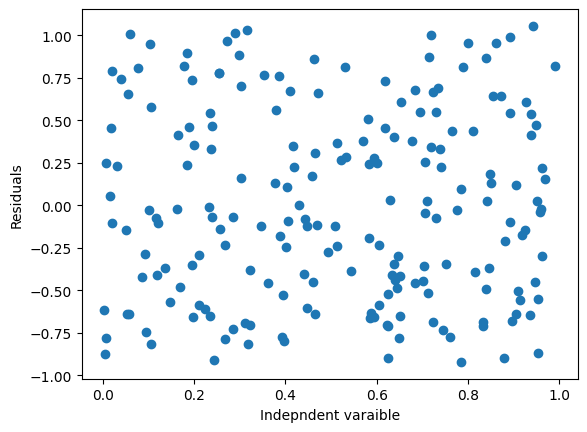

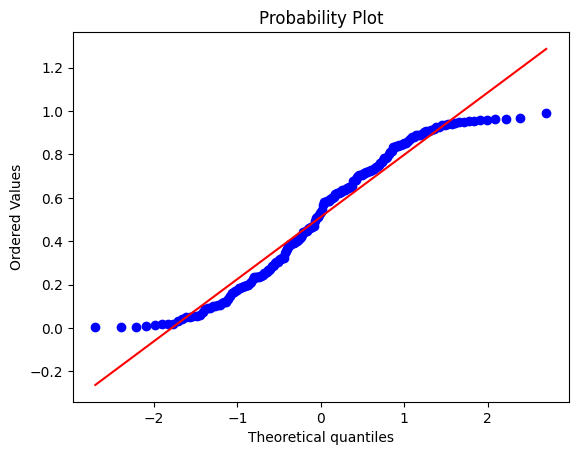

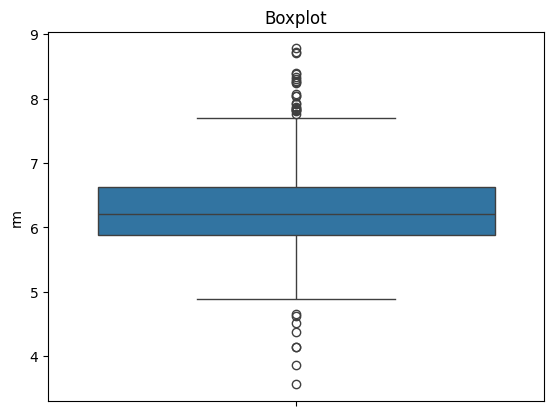

              crim           zn        indus        chas         nox  \
count  1012.000000  1012.000000  1012.000000  506.000000  506.000000   
mean    180.143778    12.008350    16.834792    0.069170    0.554695   
std     188.132839    17.250728     9.912616    0.253994    0.115878   
min       0.006320     0.000000     0.460000    0.000000    0.385000   
25%       0.257830     0.000000     8.375000    0.000000    0.449000   
50%      24.021000     7.240000    18.100000    0.000000    0.538000   
75%     391.435000    16.780000    21.890000    0.000000    0.624000   
max     396.900000   100.000000    50.000000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534  
std      0.702617   28.148861    2.105710    8.707259  168.537116    2.164946  
min      3.561000    2.900000  

In [7]:
# Variable is chatcteristic, number or quantity that can be measured or counted

# Factors to Foreseeing variables::
# many algo not support na
# missing values affect distribution
# some algo assume distributin of variables with target

titanic = pd.read_csv('../assets/FeatureEng/titanic.csv')

# --- identify vars numerical/categorical
def tweak_titanic(df_:pd.DataFrame)->pd.DataFrame:
    return(
        df_.assign(
            cabin =df_['cabin'].str.split().str[0]
        ).replace("?",np.nan).astype({
            'sex':'category',
            'pclass':pd.CategoricalDtype([3,2,1],ordered=True),
            'survived':'category',
            'fare':'Float64',
            'age':'float32',
            'ticket':'str',
            'cabin':'category',
            'sibsp':'int32'
        })
    )

titanic = titanic.pipe(tweak_titanic)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,tight_layout=True,figsize=(10,4))
titanic['sibsp'].hist(bins=20,ax=ax1,label='discret')
ax1.legend()                                               # discrete values
titanic['fare'].hist(bins=50,ax=ax2,label='conti')
ax2.legend()                                               # continuous values
titanic['embarked'].value_counts().plot.pie(ax=ax3,autopct='%.2f%%',label='embarked count')
plt.show()


# --- Quantify data
def tweak_cup98lrn(df_:pd.DataFrame)->pd.DataFrame:
    # we will use the selected variables for the recipe
    cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT','MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE','GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
    return(
        df_[cols]
    )
cup98LRN = pd.read_csv('../assets/FeatureEng/cup98lrn.zip')
cup98LRN = cup98LRN.pipe(tweak_cup98lrn)

print(pd.DataFrame( [cup98LRN.select_dtypes('number').isnull().mean().mul(100), cup98LRN.select_dtypes('number').dtypes],index=['missing_percent','dtypes']).T.to_string())
cup98LRN.isnull().mean().mul(100).plot(kind='bar',figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantfying missing data')
plt.show()



# --- cardinality
# The number of unique categories in a variable is called cardinality.
print(cup98LRN.select_dtypes('object').replace(' ',np.nan).nunique().to_frame('nunique').to_string())
cup98LRN.select_dtypes('object').replace(' ',np.nan).nunique().plot.bar(figsize=(6,4))
plt.ylabel('Number of unique categories')
plt.xlabel('variables')
plt.title('cardinality')
plt.show()


# pinpointing rare
cars = pd.read_csv('../assets/FeatureEng/car+evaluation.zip',header=None).rename(columns= {k:v for k,v in enumerate(['buying', 'maint', 'doors', 'persons', 'lug_boot','safety', 'class'])})
label_freq = cars['class'].value_counts()/cars.shape[0]
label_freq.sort_values(ascending=False).plot.bar()
plt.ylabel('percentage of cars within category')
plt.xlabel('variable: class')
plt.show()


# Identifying a linear relationship
boston = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston", sep="\s+", skiprows=22, header=None)
boston.rename(columns={k:v for k,v in enumerate(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat', 'medv']) },inplace=True)
# data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
# target = boston.values[1::2, 2]
# boston.hist(bins=30,figsize=(12,12),density=True)
# plt.show()


# Linear models assume that the independent variables are normally distributed. In this recipe, we will learn how to assess normal distributions of variables.
x = np.random.rand(200)
y = x*10 + np.random.rand(200)*2   # y=10x+2
data = pd.DataFrame([x,y]).T.rename(columns={k:v for k,v in enumerate(['X','y'])})

# Seaborn lmplot() allows you to fit many polynomial models. You can indicate the order of the model by utilizing the order argument. In this recipe, we fit a linear model, so we indicated order=1.
sns.lmplot(data=data,x='X',y='y',order=1)
plt.ylabel('Target')
plt.xlabel('independent variable')
plt.show()

# step 1: build a linear model
lreg = LinearRegression()
lreg.fit(data['X'].to_frame(),data['y'])

# step 2: obtain the predictions
predictions = lreg.predict(data['X'].to_frame())

# step 3: calculate the residuals
residuals = (data['y']-predictions)


# step 4: observe the distribution of the residuals
# Residuals plot
# if the relationship is linear, the noise should be random, centered around zero, and follow a normal distribution
# we plot the error terms vs the independent variable x error values should be around 0 and homogeneously distributed
sns.displot(residuals,kind='hist',kde=True)
plt.xlabel('Residuals')
plt.show()

# no pattern should follow in independent variable with residuals
plt.scatter(y=residuals,x=data['X'])
plt.ylabel('Residuals')
plt.xlabel('Indepndent varaible')
plt.show()


# Identify a normal distribution
# Q-Q Plot should fall along a 45 degree diaginal.
# Most of the observations of RM fall on the 45 degree line, which suggests that the distribution is approximately Gaussian, with some deviation towards the larger and smaller values of the variable.
st.probplot(data['X'], dist="norm", plot=plt)
plt.show()



# Outlier
# data point that is significantly different from the remaining data (IQR::BoxPLot)
#  Upper boundary = 75th quantile + (IQR * 1.5)
#  Lower boundary = 25th quantile - (IQR * 1.5)
#  IQR = 75th quantile - 25th quantile
sns.boxplot(y=boston['rm'])
plt.title('Boxplot')
plt.show()

# TODO: calculating IQR 
def find_bounderies(df:pd.DataFrame, variable:str, distance:float)->tuple:
    iqr:float = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary:float = df[variable].quantile(0.25) - (iqr*distance)
    upper_boundary:float = df[variable].quantile(0.25) - (iqr*distance)
    return (upper_boundary,lower_boundary)



#  comparing feature magnitude
print(boston.describe().to_string())

## Imputing Missing Data
- Removing observations with missing data
- performing mean or median imputation
- Implementing mode or frequent category imputation
- Replacing missing values with an arbitary number
- capturing missing values in a bespoke category 
- Replacing missing values with a value at the end of distribution
- Implementing random sample imputation
- Adding a missing value indicator variable
- Performing multivariate imputation by chained equations
- Assembling an imputation pipeline with scikit-learn
- Assembling an imputation pipeline with feature-engine



## Encoding categorical variables
- Creating binary variables through one-hot encoding
- Performing one-hot encoding of frequent categories
- Replacing categories with ordinal numbers
- Replacing categories with counts or frequency of observations
- Encoding with integers in an ordered manner
- Encoding with the mean of the target
- Encoding with the weight of Evidence
- grouping rare or infrequent categories
- Performing binary encoding
- Performing feature hashing

## Transforming Numerical Variables
- Transforming variables with log
- Transforming variables with reciprocal
- Using square and cube root to transform
- Transforming variables with power transform
- Transforming variables with box-cox
- Performing Yeo-Johnson transformation on numerical

## Performing variable Discretization
- Divifing variable into intervals of equal width
- Sorting the variable values in intervals of equal frequency
- Performing discretization followed by categorical encoding
- Allocating the variable values in arbitary intervals
- Performing discretization with k-means clustering
- using DT for discretization

## Working with outliers
- Trimming outliers from the dataset
- Performing winsorization
- capping the variable at arbitary max and min values
- performing zero-coding -capping the variable at zero

## Derving Features from Dates and Time Variables
- Extracting date and time parts from datetime variable
- deriving representations of the year and month
- creating representation of day and week
- Extracting time parts from a time variable
- Capturing the elapsed time between datetime variables
- working with time in different time zones

## Performing Feature Scaling
- standardizing the features
- performing mean normalization
- scaling to the maximum and min values
- implementing maximum absolute scaling
- scaling with the median and quantiles
- scaling to vector unit length

## Applying Mathematical computations to Features 
- Combining multiple features with statistical operation
- combining pairs of features with mathematical functions
- performing polynomial expansion
- deriving new features with DT
- carrying out PCA

## Creating Features with Transactional and Time Series Data
- aggregating transactions with mathematical operations
- aggregating transactions in a time window
- determining the number of local maxima and minima
- deriving time elapsed between time-stamped events
- creating features from transaction with featuretools

## Extracting Features from text variables
- counting charcters, words and vocabulary
- estimating text compleity by counting sentences
- creating features with bag-of-words and n-grams
- Implementing term frequency-inverse document frequency
- cleaning and stemming text variables
